In [2]:
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import csv
import os
import math

In [3]:
def take_data(my_file, index):
    """
    Returns a list which contains particular data from my_file.

    Paramters
    ---------
    my_file(file)
    """
    if os.path.isfile(my_file):
        with open(my_file, "r") as csv_file:
            csv_reader = csv.reader(csv_file)
            lines = []
            for line in csv_reader:
                try:
                    lines.append(float(line[index]))
                except:
                    lines.append(line[index])
            del lines[0]
        return lines
    else:
        raise FileNotFoundError

S&P 500 jest jednym z najbardziej znanych wskaźników. Jest to indeks giełdowy, w którego skład wchodzi 500 przedsiębiorstw o największej kapitalizacji; głównie przedsiębiorstwa amerykańskie. Patrząc na zmiany cen akcji S&P 500, możemy dużo powiedzieć o ogólnej kondycji rynku na świecie.


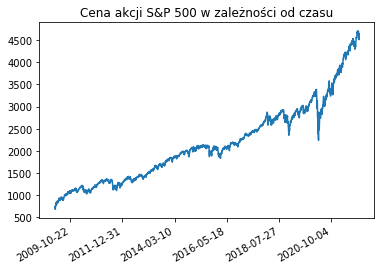

In [27]:
sp500 = take_data("SP500.csv", 1) #z datami na osi 0x
sp500_times = take_data("SP500.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in sp500_times[1250:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 800))
plt.plot(times, sp500[1250:])
plt.gcf().autofmt_xdate()
plt.title("Cena akcji S&P 500 w zależności od czasu")
plt.show()

W jaki sposób możemy opisać zmiany ceny równaniem? Spróbujmy wyjść z prostego modelu, który zakłada, że im wyższa cena akcji, tym szybciej będzie rosła. Niech $C(t)$ oznacza wartość ceny w czasie $t$, natomiast $w$ współczynnik wzrostu ceny:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Dla uproszczenia obliczeń wygenerujmy wykres z liczbami zamiast dat:

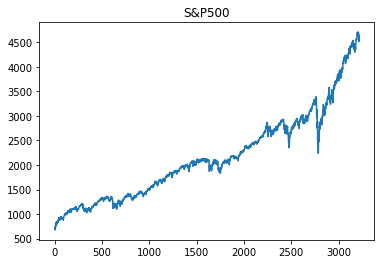

In [26]:
sp500 = take_data("SP500.csv", 1) #z liczbami na osi 0x
plt.title("S&P500")
plt.plot(sp500[1250:])
plt.show()

Odczytajmy z wykresu dwie wartości: $$C(0) = 735$$  $$C(3000) = 3787$$ a następnie rozwiążmy równanie.
$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw$$

$$\int \frac{\mathrm{d}C}{C} = w\int \mathrm{d}t$$

$$\mathrm{ln}(C) = wt + K$$

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3000) = 3787$:

$$w \approx 0,00054$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00054t} $$

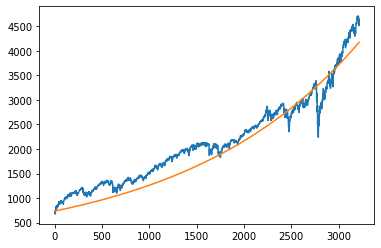

In [39]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00054*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Początkowo wykres całkiem dobrze odzwierciedla dynamikę zmiany cen akcji, jednak po $t = 3000$ tempo wzrostu jest zbyt niskie. Odczytajmy wartość $C$ dla $t = 3150$:
$$C(3150) = 4524$$ a następnie znajdźmy stałe $K$ oraz $w$ dla nowych warunków.

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3150) = 4524$:

$$w \approx 0,00056$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00056t} $$

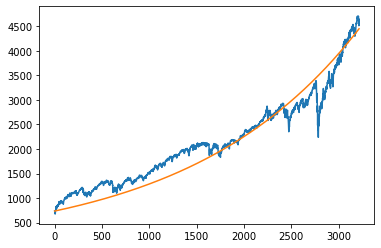

In [40]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00056*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Widać, że krzywa lepiej przybliża wykres cen akcji w późniejszym okresie, jednak mniej pokrywa się ze stanem sprzed roku 2016 (na wykresie będzie to wartość 1700). 

Przyjrzyjmy się wykresowi przedstawiającemu ceny akcji firmy Tesla:

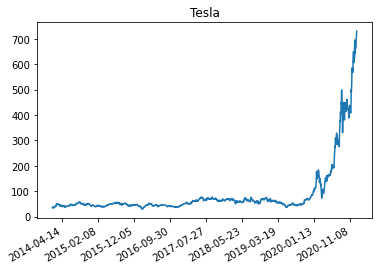

In [9]:
tesla = take_data("Tesla.csv", 1)
tesla_times = take_data("Tesla.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in tesla_times[:1750]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 300))
plt.plot(times, tesla[:1750])
plt.gcf().autofmt_xdate()
plt.title("Tesla")
plt.show()

Wygląda on oryginalnie: przez kilka lat cena utrzymywała się na względnie stałym poziomie. Pod koniec 2019 roku zaczęła rosnąć, ale znacznie spadła w okolicach marca 2020 roku z powodu paniki związanej z rozpoczynającą się pandemią. To jednak tylko chwilowo zahamowało jej wzrost; po kilku miesiącach cena wzrastała w bardzo szybkim tempie. 

Spróbujmy przybliżyć dynamikę zmian cen akcji Tesli za pomocą prostego równania:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Gdzie $C(t)$ oznacza cenę w czasie $t$, natomiast $w$ współczynnik wzrostu ceny.
Mamy więc:

$$\mathrm{ln}(C) = wt + K$$

Aby wyznaczyć współczynnik $w$ oraz stałą całkowania, potrzebujemy odczytać dwie wartości z wykresu. Zamieńmy więc daty na liczby reprezentujące czas:

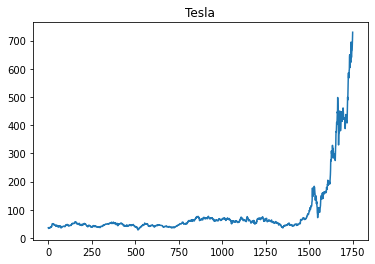

In [8]:
tesla = take_data("Tesla.csv", 1) #z liczbami na osi 0x
plt.title("Tesla")
plt.plot(tesla[:1750])
plt.show()

Odczytajmy dane dla $t=1400$ oraz dla $t=1750$:
$$C(1400) = 43,128$$
$$C(1750) = 735,11$$

Po podstawieniu do równania dostajemy:

$$w \approx 0,0081 $$
$$K \approx -7,5792 $$

Więc ostatecznie:

$$ C(t) = e^{-7,5792}\cdot e^{0,0081t} $$

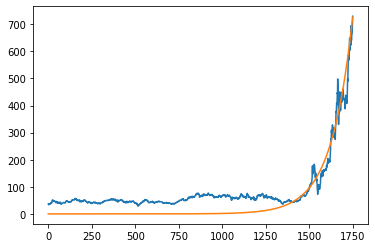

In [15]:
time = [t for t in range(0, 1750)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1750)]
plt.plot(tesla[:1750])
plt.plot(time, solution)
plt.show()

Krzywa w dobry sposób odwzorowuje dynamikę zmian ceny akcji Tesli.

Jednak zobaczmy, co stało się z cenami Tesli w późniejszym czasie:

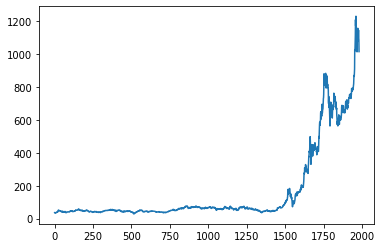

In [18]:
time = [t for t in range(0, 1982)]
plt.plot(tesla)
plt.show()

Akcje zaczęły gwałtownie spadać! Jeżeli spróbujemy porównać je z otrzymanym rozwiązaniem, otrzymamy:

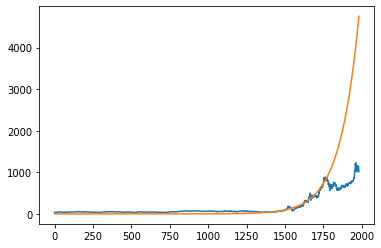

In [19]:
time = [t for t in range(0, 1982)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1982)]
plt.plot(tesla)
plt.plot(time, solution)
plt.show()

In [16]:
len(tesla)

1982

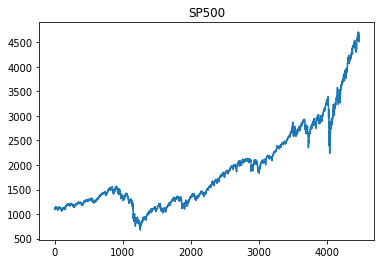

In [110]:
sp500 = take_data("SP500.csv", 1) #z liczbami na osi 0x
plt.title("S&P500")
plt.plot(sp500)
plt.show()

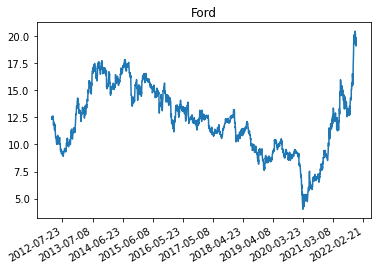

In [100]:
ford = take_data("Ford.csv", 1)
ford_times = take_data("Ford.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in ford_times]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 350))
plt.plot(times, ford)
plt.gcf().autofmt_xdate()
plt.title("Ford")
plt.show()

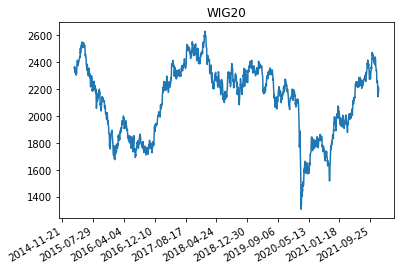

In [103]:
wig20 = take_data("WIG20.csv", 1)
wig20_times = take_data("WIG20.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in wig20_times]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 250))
plt.plot(times, wig20)
plt.gcf().autofmt_xdate()
plt.title("WIG20")
plt.show()

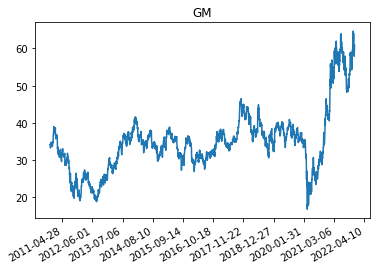

In [109]:
GM = take_data("GM.csv", 1)
GM_times = take_data("GM.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in GM_times]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 400))
plt.plot(times, GM)
plt.gcf().autofmt_xdate()
plt.title("GM")
plt.show()